# AIT511 - Multiclass Obesity Classification
## Author: Rahul Raman, Aayank Singhai


In [3]:
# Analysis part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive

warnings.filterwarnings("ignore")

# --- Mount Drive ---
drive.mount('/mnt/drive')
try:
    # Load train.csv
    df_train = pd.read_csv('/mnt/drive/MyDrive/Obesity Dataset/train.csv')
except FileNotFoundError:
    print("Error: train.csv not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /mnt/drive


In [ ]:
# ======================================================
#  1. DATA QUALITY & STRUCTURE CHECKS
# ======================================================

print("\n--- 1. Data Types and Non-Null Counts ---")
# Use .info() to check data types and get a quick count of non-null values
df_train.info()

print("\n--- 2. Missing Value Check (Explicit Count) ---")
# Summing up all null values for each column
missing_values = df_train.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found.")
if missing_values.sum() == 0:
    print("\n Status: No missing values found.")
else:
    print(f"\n Status: Found a total of {missing_values.sum()} missing values.")

print("\n--- 3. Duplicate Rows Check ---")
duplicate_rows = df_train.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")
if duplicate_rows == 0:
    print("\n Status: No duplicate rows found.")
else:
    print(f"\n Status: Found {duplicate_rows} duplicate rows.")

print("\n--- 4. Numerical Feature Statistics ---")
display(df_train.describe())

print("\n--- 5. Categorical Feature Statistics ---")

display(df_train.describe(include=['object']))

print("\n Pre-EDA checks complete. Starting main EDA...")


--- 1. Data Types and Non-Null Counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  fl

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,7766.000000,23.816308,1.699918,87.785225,2.442917,2.760425,2.027626,0.976968,0.613813
std,4484.135201,5.663167,0.087670,26.369144,0.530895,0.706463,0.607733,0.836841,0.602223
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3883.000000,20.000000,1.630927,66.000000,2.000000,3.000000,1.796257,0.007050,0.000000
50%,7766.000000,22.771612,1.700000,84.000000,2.342220,3.000000,2.000000,1.000000,0.566353
75%,11649.000000,26.000000,1.762921,111.600553,3.000000,3.000000,2.531456,1.582675,1.000000
max,15532.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000



--- 5. Categorical Feature Statistics ---


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,WeightCategory
count,15533,15533,15533,15533,15533,15533,15533,15533,15533
unique,2,2,2,4,2,2,3,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
freq,7783,12696,14184,13126,15356,15019,11285,12470,2983



 Pre-EDA checks complete. Starting main EDA...


In [ ]:
# ======================================================
# 2. MAIN EDA: ANALYSIS & VISUALIZATION
# ======================================================

# --- 2a. Renaming Attributes ---
column_rename_map = {
    'family_history_with_overweight': 'Family_History_Overweight',
    'FAVC': 'High_Caloric_Food_Consumption',
    'FCVC': 'Vegetable_Consumption_Frequency',
    'NCP': 'Number_of_Main_Meals',
    'CAEC': 'Food_Between_Meals',
    'CH2O': 'Daily_Water_Intake',
    'SCC': 'Calorie_Consumption_Monitoring',
    'FAF': 'Physical_Activity_Frequency',
    'TUE': 'Tech_Device_Usage_Time',
    'CALC': 'Alcohol_Consumption_Frequency',
    'MTRANS': 'Transportation_Method'
    # NObeyesdad is the target
}
df_train.rename(columns=column_rename_map, inplace=True)
print("\n Attributes renamed for better readability.")


# --- 2b. Feature Engineering: BMI ---
df_train['BMI'] = df_train['Weight'] / (df_train['Height'] ** 2)
print("Created 'BMI' feature.")

# --- 2c. Define Column Types with New Names ---

numerical_cols = [
    'Age', 'Height', 'Weight', 'BMI',
    'Vegetable_Consumption_Frequency',
    'Number_of_Main_Meals',
    'Daily_Water_Intake',
    'Physical_Activity_Frequency',
    'Tech_Device_Usage_Time'
]

categorical_cols = [
    'Gender',
    'Family_History_Overweight',
    'High_Caloric_Food_Consumption',
    'Food_Between_Meals',
    'SMOKE',
    'Calorie_Consumption_Monitoring',
    'Alcohol_Consumption_Frequency',
    'Transportation_Method'
]
# Define target column
target_col = 'NObeyesdad'


 Attributes renamed for better readability.
Created 'BMI' feature.
 Defined numerical and categorical columns with new names.



 Generating histograms for numerical features...
 Saved train_numerical_distributions.png


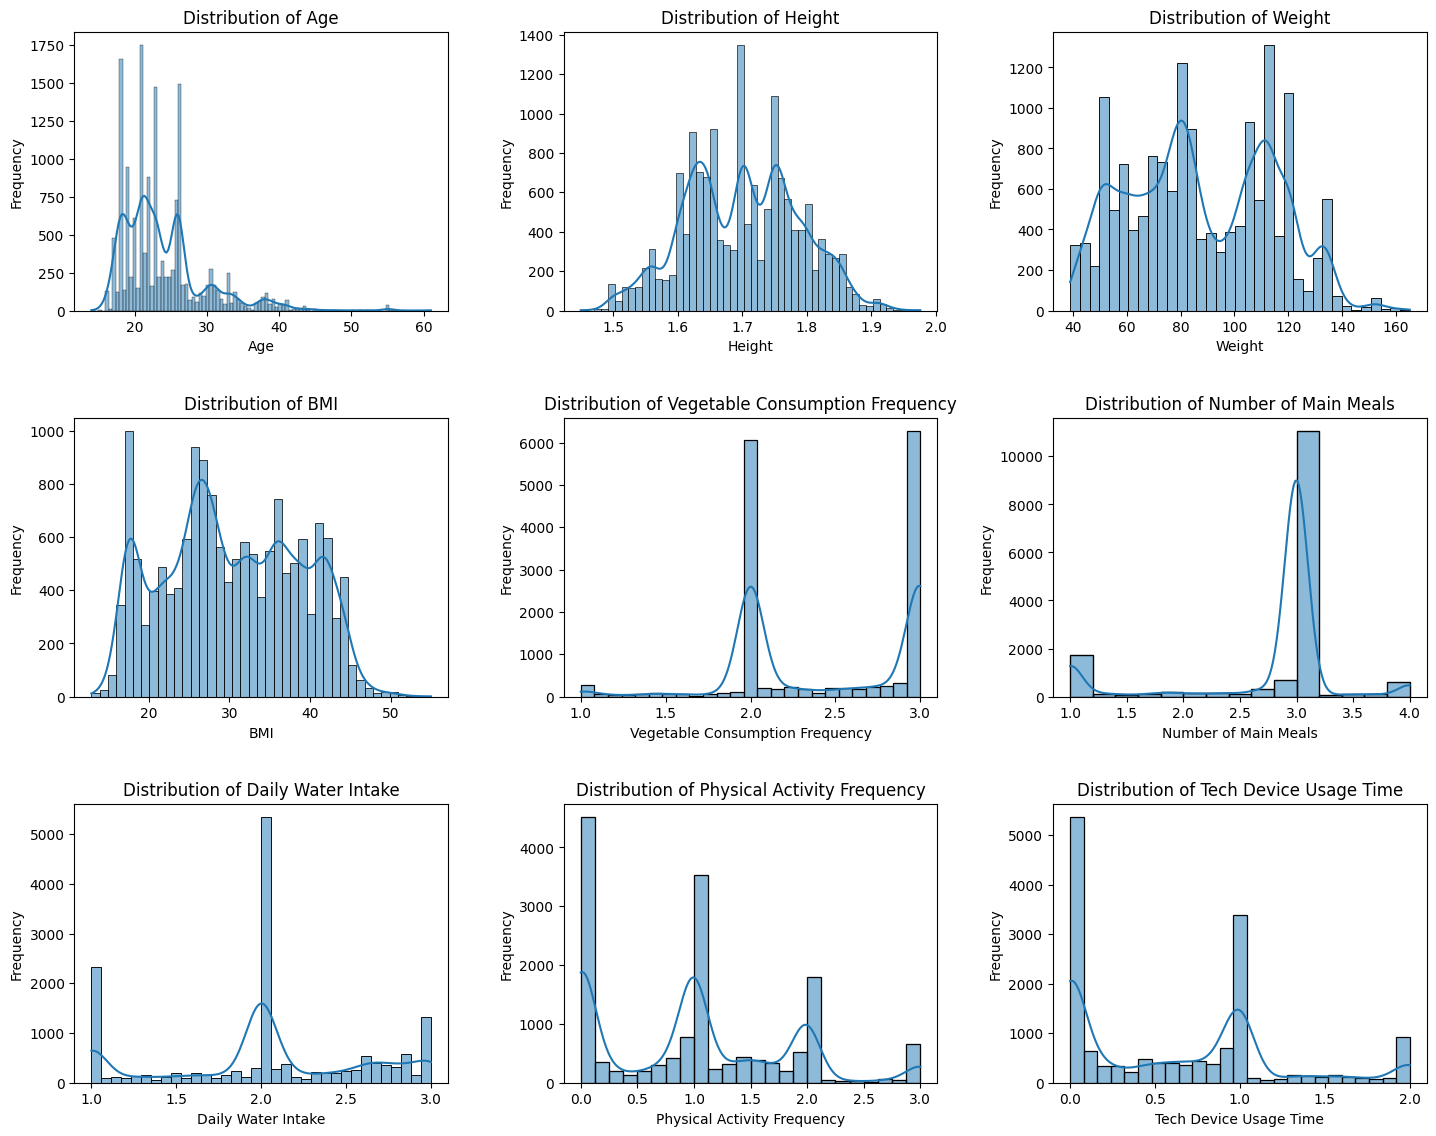

In [ ]:
# --- 2d. Univariate Analysis: Numerical Features ---
print("\n Generating histograms for numerical features...")
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ")}', fontsize=12)
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Frequency')
plt.tight_layout(pad=3.0)

plt.savefig("train_numerical_distributions.png")


 Generating bar charts for categorical features...
 Saved train_categorical_distributions.png


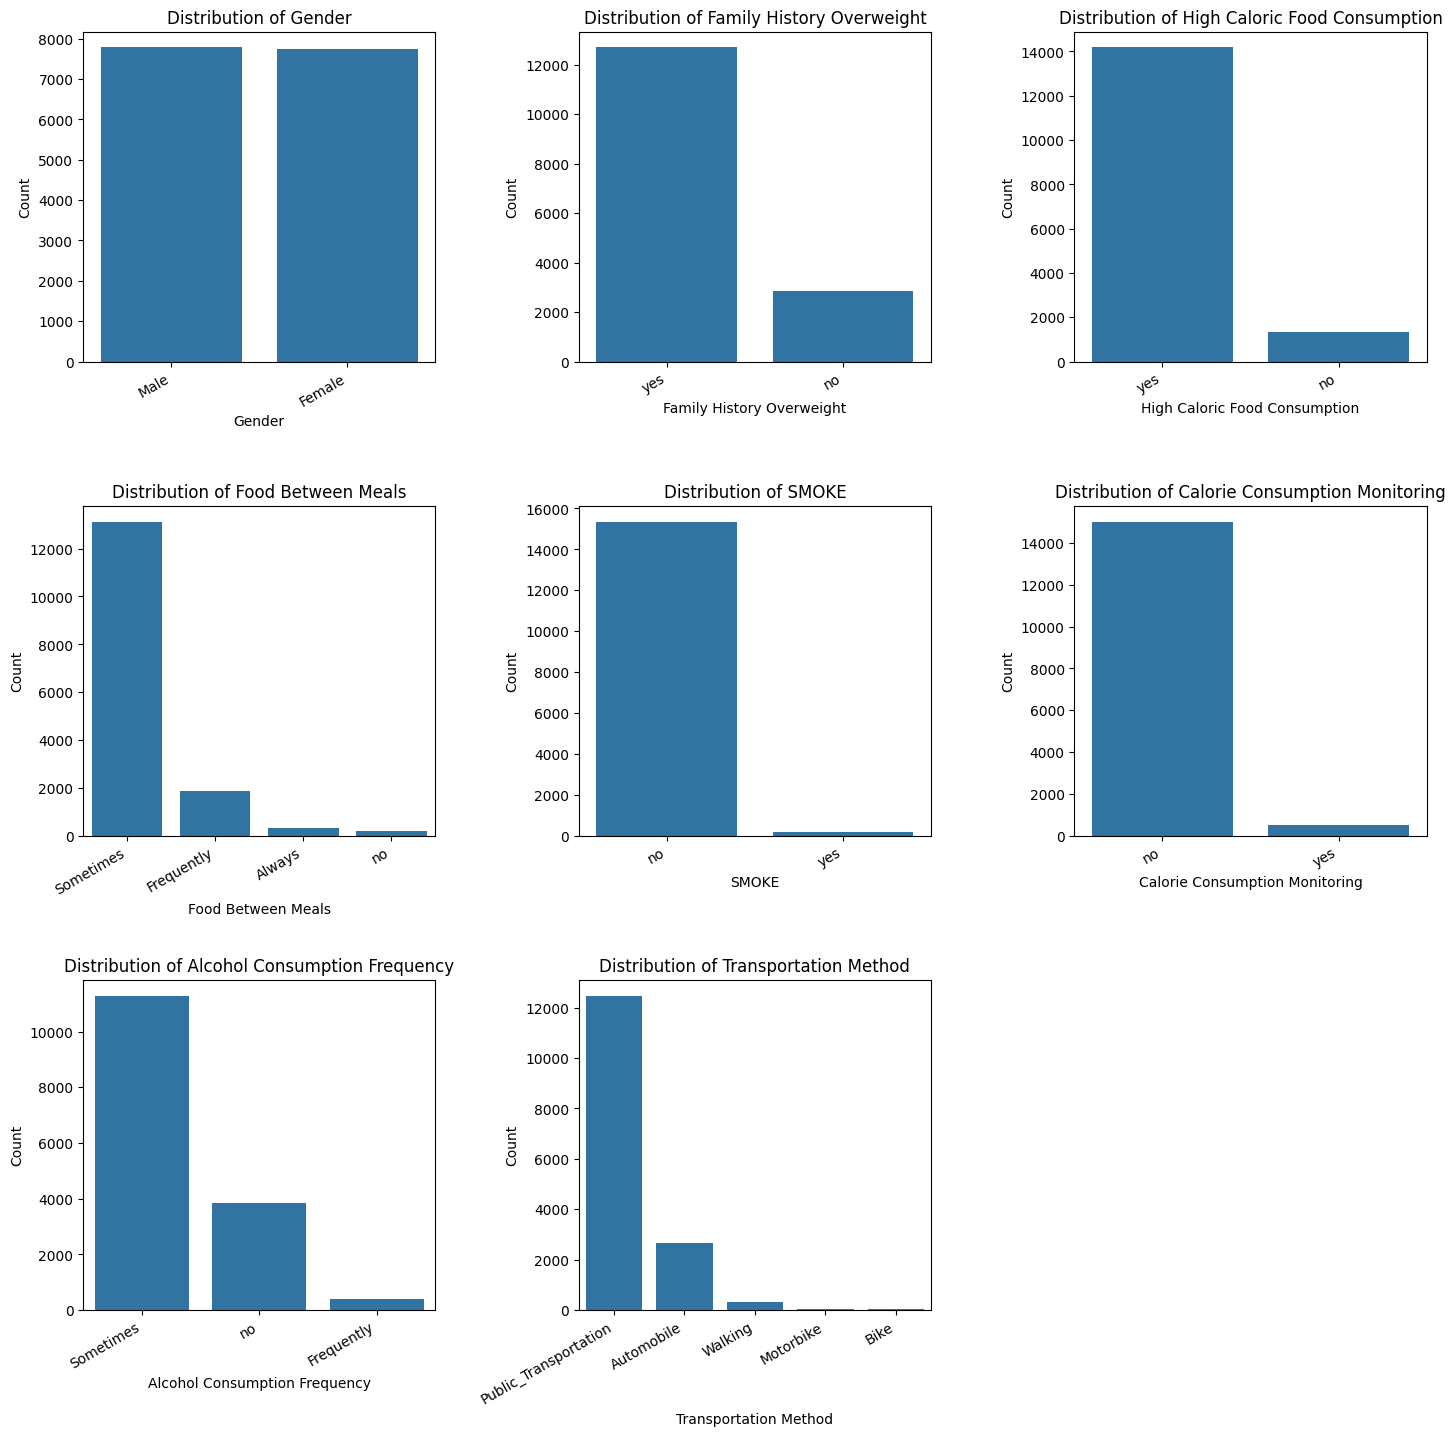

In [ ]:
# --- 2e. Univariate Analysis: Categorical Features ---
print("\n Generating bar charts for categorical features...")
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    if col in df_train.columns:
        order = df_train[col].value_counts().index
        sns.countplot(data=df_train, x=col, order=order)
        plt.title(f'Distribution of {col.replace("_", " ")}', fontsize=12)
        plt.xlabel(col.replace("_", " "))
        plt.ylabel('Count')
        plt.xticks(rotation=30, ha='right') # Rotate labels for readability
    else:
        print(f"Warning: Column '{col}' not found in df_train.")
plt.tight_layout(pad=3.0)
plt.savefig("train_categorical_distributions.png")


 Generating correlation heatmap...
 Saved train_correlation_heatmap.png


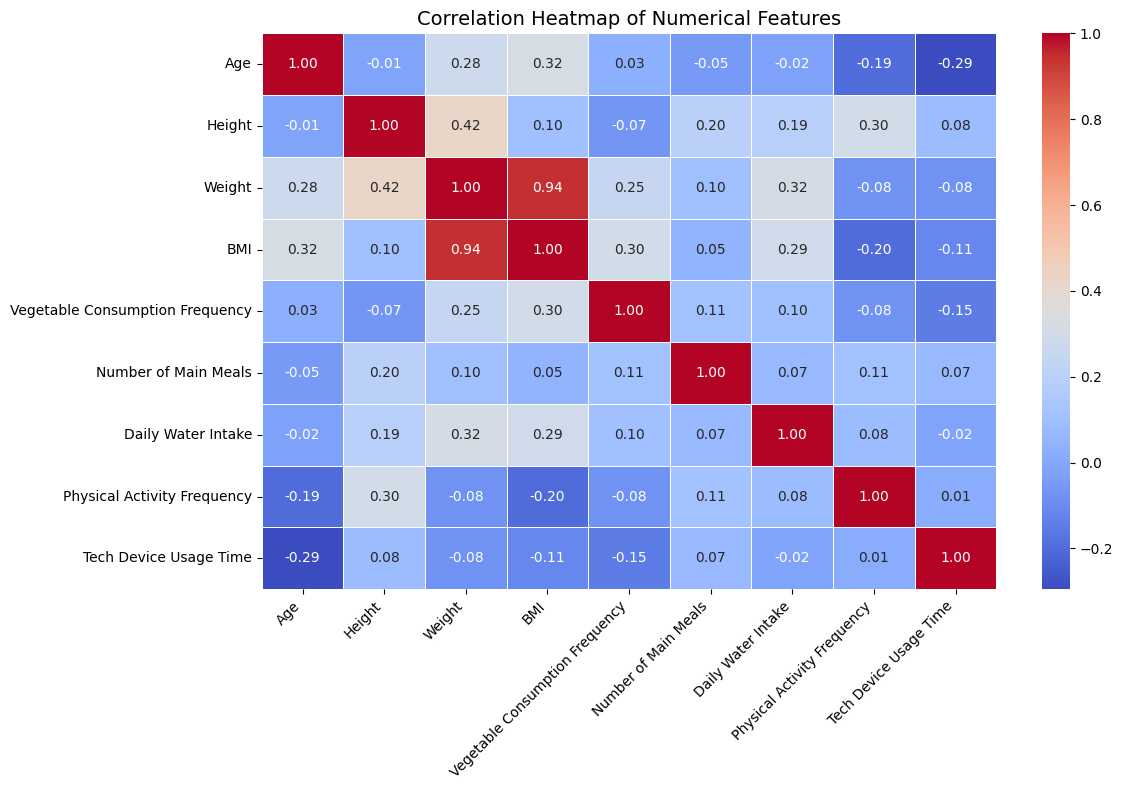

In [ ]:
# --- 2f. Bivariate Analysis: Numerical Correlation ---
print("\n Generating correlation heatmap...")
plt.figure(figsize=(12, 8))
# Labels
renamed_numerical_labels = [label.replace("_", " ") for label in numerical_cols]
# Ensure all columns exist before calculating correlation
valid_numerical_cols = [col for col in numerical_cols if col in df_train.columns]
corr_matrix = df_train[valid_numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            xticklabels=[label.replace("_", " ") for label in valid_numerical_cols],
            yticklabels=[label.replace("_", " ") for label in valid_numerical_cols])

plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("train_correlation_heatmap.png")
print(" Saved train_correlation_heatmap.png")


 Generating Bivariate Box Plots (Categorical vs. Numerical)...
Saved train_bivariate_cat_vs_num.png


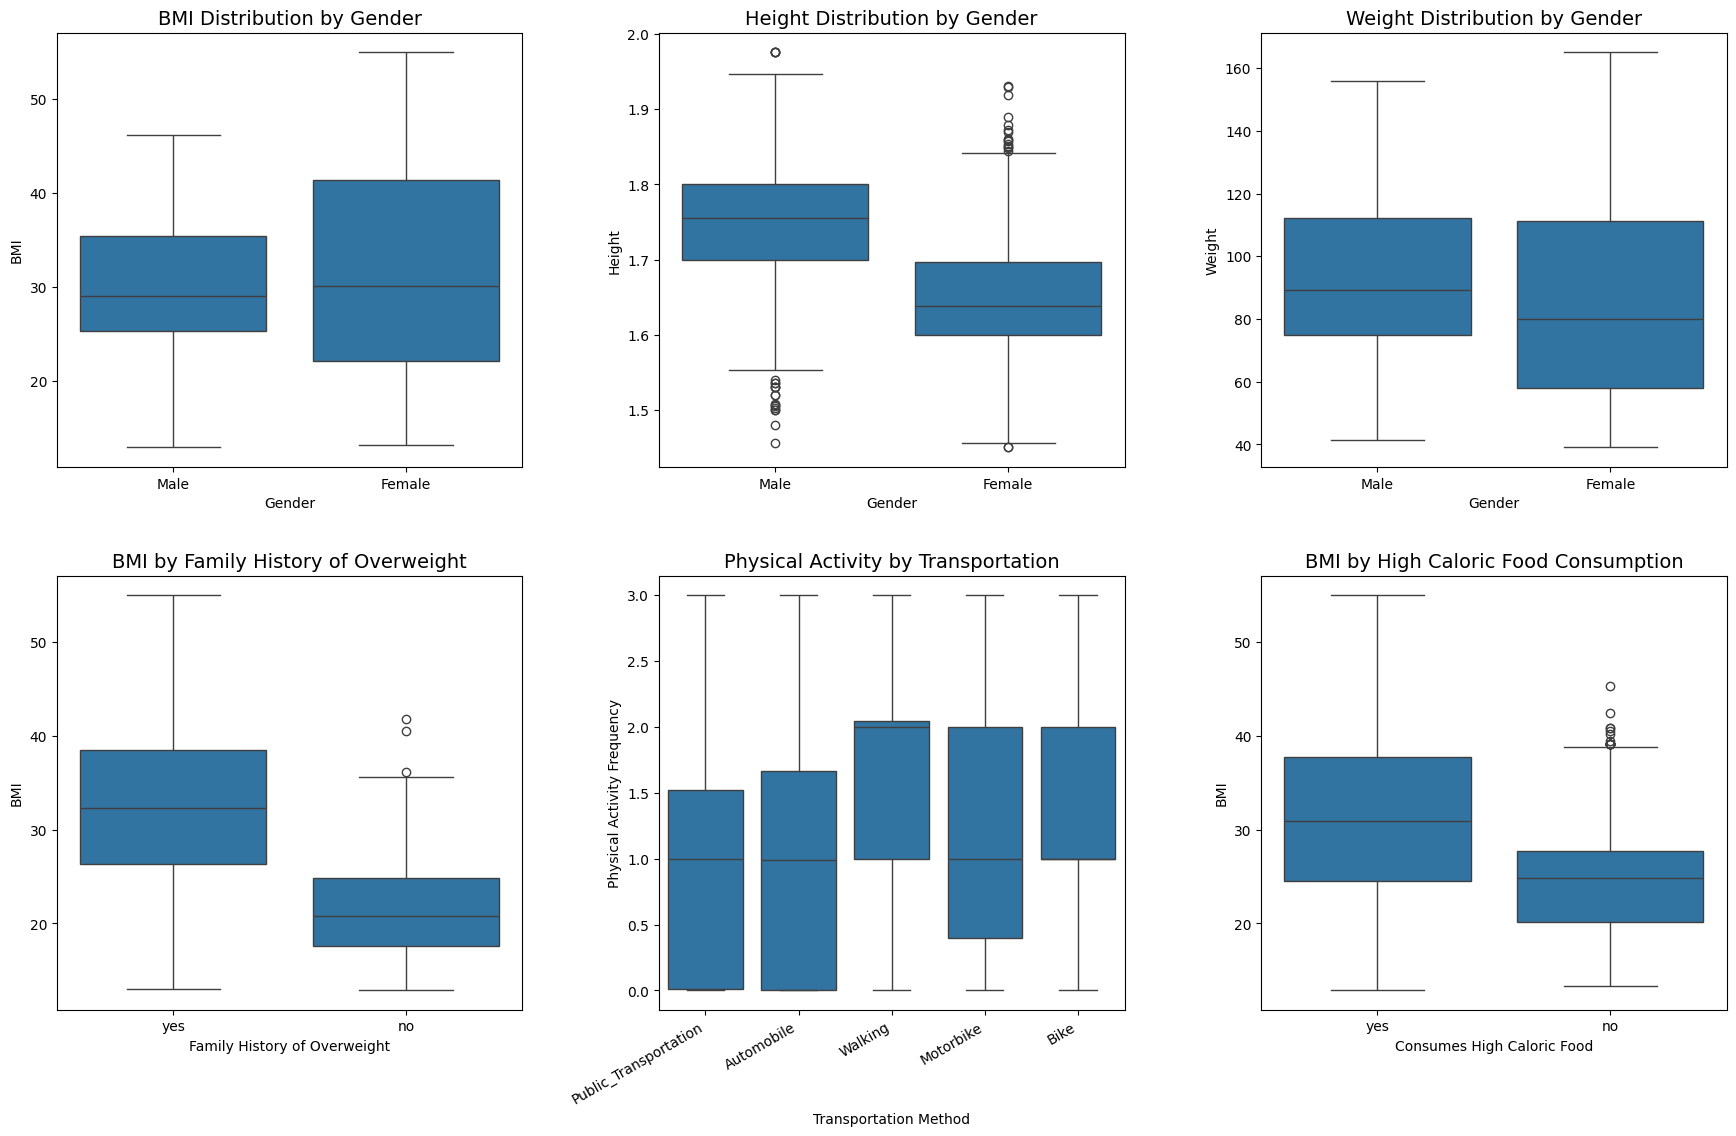

In [ ]:
# --- 2g. Bivariate Analysis: Categorical vs. Numerical ---
print("\n Generating Bivariate Box Plots (Categorical vs. Numerical)...")
plt.figure(figsize=(18, 12))

# Plot 1: Gender vs. BMI
plt.subplot(2, 3, 1)
sns.boxplot(data=df_train, x='Gender', y='BMI')
plt.title('BMI Distribution by Gender', fontsize=14)

# Plot 2: Gender vs. Height
plt.subplot(2, 3, 2)
sns.boxplot(data=df_train, x='Gender', y='Height')
plt.title('Height Distribution by Gender', fontsize=14)

# Plot 3: Gender vs. Weight
plt.subplot(2, 3, 3)
sns.boxplot(data=df_train, x='Gender', y='Weight')
plt.title('Weight Distribution by Gender', fontsize=14)

# Plot 4: Family History vs. BMI
plt.subplot(2, 3, 4)
sns.boxplot(data=df_train, x='Family_History_Overweight', y='BMI')
plt.title('BMI by Family History of Overweight', fontsize=14)
plt.xlabel('Family History of Overweight')

# Plot 5: Transportation Method vs. Physical Activity
plt.subplot(2, 3, 5)
sns.boxplot(data=df_train, x='Transportation_Method', y='Physical_Activity_Frequency')
plt.title('Physical Activity by Transportation', fontsize=14)
plt.xlabel('Transportation Method')
plt.ylabel('Physical Activity Frequency')
plt.xticks(rotation=30, ha='right')

# Plot 6: High Caloric Food Consumption vs. BMI
plt.subplot(2, 3, 6)
sns.boxplot(data=df_train, x='High_Caloric_Food_Consumption', y='BMI')
plt.title('BMI by High Caloric Food Consumption', fontsize=14)
plt.xlabel('Consumes High Caloric Food')

plt.tight_layout(pad=3.0)
# Save with a new name
plt.savefig("train_bivariate_cat_vs_num.png")


Generating Bivariate Count Plots (Categorical vs. Categorical)...
 Saved train_bivariate_cat_vs_cat.png


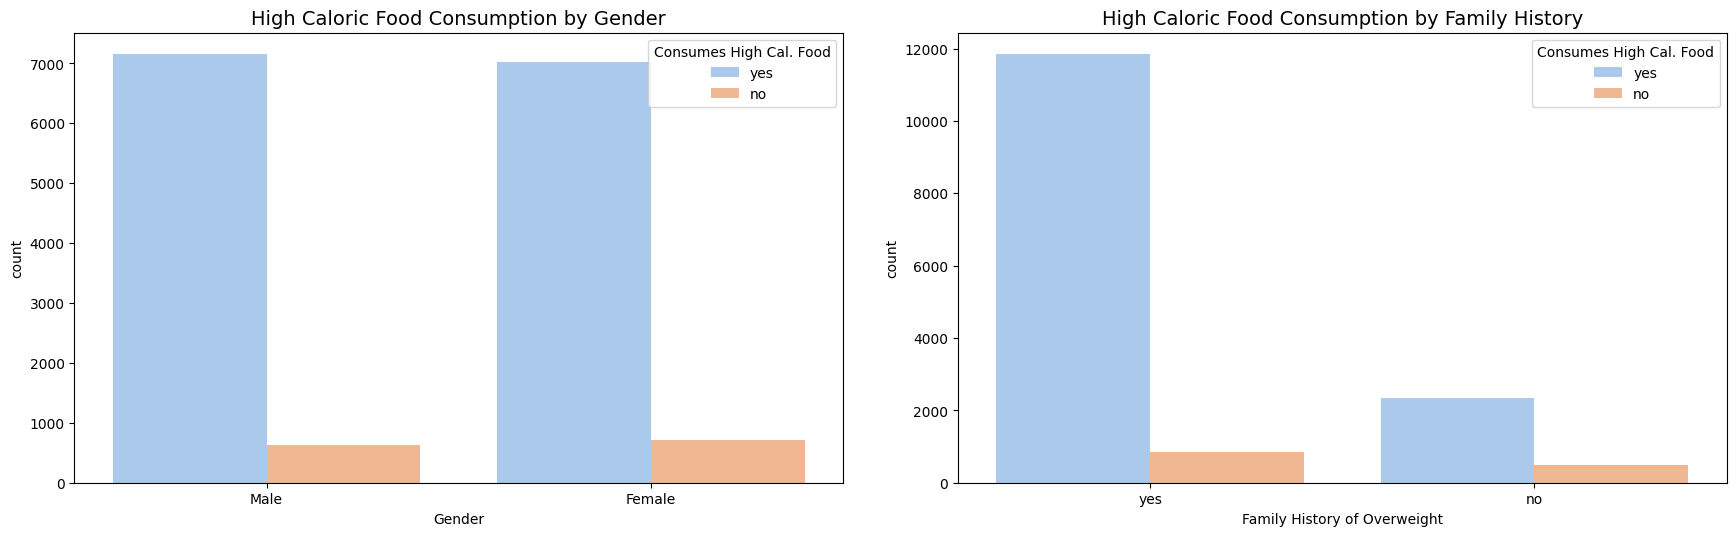

In [ ]:
# --- 2h. Bivariate Analysis: Categorical vs. Categorical ---
print("\nGenerating Bivariate Count Plots (Categorical vs. Categorical)...")
plt.figure(figsize=(18, 6))

# Plot 1: Gender vs. High Caloric Food Consumption
plt.subplot(1, 2, 1)
sns.countplot(data=df_train, x='Gender', hue='High_Caloric_Food_Consumption', palette='pastel') # Use df_train
plt.title('High Caloric Food Consumption by Gender', fontsize=14)
plt.legend(title='Consumes High Cal. Food')

# Plot 2: Family History vs. High Caloric Food Consumption
plt.subplot(1, 2, 2)
sns.countplot(data=df_train, x='Family_History_Overweight', hue='High_Caloric_Food_Consumption', palette='pastel') # Use df_train
plt.title('High Caloric Food Consumption by Family History', fontsize=14)
plt.xlabel('Family History of Overweight')
plt.legend(title='Consumes High Cal. Food')

plt.tight_layout(pad=3.0)
# Save with a new name
plt.savefig("train_bivariate_cat_vs_cat.png")
print(" Saved train_bivariate_cat_vs_cat.png")

# --- Analysis involving the target variable ---
target_col = 'NObeyesdad'
if target_col in df_train.columns:
    print(f"\n Generating count plot for the target variable '{target_col}'...")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, y=target_col, order = df_train[target_col].value_counts().index) # Use df_train
    plt.title(f'Distribution of Obesity Levels ({target_col})')
    plt.xlabel('Count')
    plt.ylabel('Obesity Level')
    plt.tight_layout()
    plt.savefig("train_target_distribution.png")
    print(" Saved train_target_distribution.png")

    # Example: BMI distribution per Obesity Level
    print(f"\nGenerating box plot for BMI vs '{target_col}'...")
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df_train, x='BMI', y=target_col, order=sorted(df_train[target_col].unique())) # Use df_train
    plt.title(f'BMI Distribution by Obesity Level ({target_col})')
    plt.xlabel('BMI')
    plt.ylabel('Obesity Level')
    plt.tight_layout()
    plt.savefig("train_bmi_vs_target.png")
    print("Saved train_bmi_vs_target.png")

In [ ]:
#  Obesity Classification — Optuna + XGBoost + K-Fold

!pip install optuna --quiet
import pandas as pd
import numpy as np
import optuna
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

# === 1 Mount Drive & Load Data ===
drive.mount('/mnt/drive')
train_df = pd.read_csv('/mnt/drive/MyDrive/Obesity Dataset/train.csv')
test_df = pd.read_csv('/mnt/drive/MyDrive/Obesity Dataset/test.csv')

print(f" Data Loaded: Train shape: {train_df.shape}, Test shape: {test_df.shape}")

# === 2 Identify Target Column Automatically ===
TARGET = "NObeyesdad"
if TARGET not in train_df.columns:
    possible_targets = [col for col in train_df.columns if col not in test_df.columns and col.lower() != "id"]
    if len(possible_targets) == 1:
        TARGET = possible_targets[0]
    else:
        print(" Possible target columns found:")
        print(possible_targets)
        raise KeyError("Target column not found — please verify manually.")
print(f" Target column detected: {TARGET}")

# === 3 Prepare Train/Test Data ===
X = train_df.drop(columns=["id", TARGET])
y = train_df[TARGET]
test_ids = test_df["id"]

# Encode target labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# One-hot encode categorical features
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
X_enc = pd.get_dummies(X, columns=cat_cols)
test_enc = pd.get_dummies(test_df.drop(columns=["id"]), columns=cat_cols)

# Align train/test features
X_aligned, test_aligned = X_enc.align(test_enc, join="left", axis=1, fill_value=0)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aligned)
test_scaled = scaler.transform(test_aligned)

# === 4 Optuna Hyperparameter Tuning ===
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 500,2500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "objective": "multi:softprob",
        "num_class": len(le.classes_),
        "eval_metric": "mlogloss",
        "n_jobs": -1,
        "tree_method": "hist",
        "random_state": 42,
        "verbosity": 0
    }

    model = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_scaled, y_enc, cv=cv, scoring="accuracy", n_jobs=-1)
    return scores.mean()

print(" Starting Optuna hyperparameter tuning...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=35, timeout=3600)

print("\n Best Parameters Found:")
print(study.best_params)
print(f"Best CV Accuracy: {study.best_value:.4f}")

# === 5 Final Training with Best Params + K-Fold ===
best_params = study.best_params
best_params.update({
    "objective": "multi:softprob",
    "num_class": len(le.classes_),
    "eval_metric": "mlogloss",
    "n_jobs": -1,
    "tree_method": "hist",
    "random_state": 42,
})

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X_scaled))
test_preds_agg = np.zeros((len(test_scaled), len(le.classes_)))

print("\n Starting Final 10-Fold Training...")
for fold, (train_idx, val_idx) in enumerate(skf.split(X_scaled, y_enc)):
    model = XGBClassifier(**best_params)
    model.fit(X_scaled[train_idx], y_enc[train_idx])
    preds_val = np.argmax(model.predict_proba(X_scaled[val_idx]), axis=1)
    oof_preds[val_idx] = preds_val
    test_preds_agg += model.predict_proba(test_scaled) / skf.n_splits
    acc = accuracy_score(y_enc[val_idx], preds_val)
    print(f"Fold {fold+1} Accuracy: {acc:.4f}")

final_acc = accuracy_score(y_enc, oof_preds)
print(f"\n Final Mean CV Accuracy: {final_acc:.4f}")

# === 6 Final Predictions + Save to CSV ===
final_test_preds = np.argmax(test_preds_agg, axis=1)
pred_labels = le.inverse_transform(final_test_preds)

submission = pd.DataFrame({
    "id": test_ids,
    TARGET: pred_labels
})

save_path = "/mnt/drive/MyDrive/Obesity Dataset/submission_optuna_xgb.csv"
submission.to_csv(save_path, index=False)
print(f"\n Saved final predictions to: {save_path}")
print(submission.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.7 MB/s eta 0:00:00
Drive already mounted at /mnt/drive; to attempt to forcibly remount, call drive.mount("/mnt/drive", force_remount=True).


[I 2025-10-26 09:30:44,554] A new study created in memory with name: no-name-b273b82b-4a5e-43fe-b6af-4ae5a78fd742


 Data Loaded: Train shape: (15533, 18), Test shape: (5225, 17)
✅ Target column detected: WeightCategory
 Starting Optuna hyperparameter tuning...


[I 2025-10-26 09:31:28,977] Trial 0 finished with value: 0.9007277669537516 and parameters: {'n_estimators': 701, 'max_depth': 10, 'learning_rate': 0.01733732840425069, 'subsample': 0.6949721877167955, 'colsample_bytree': 0.7806126790018573, 'gamma': 3.1602841162243065, 'min_child_weight': 7, 'reg_alpha': 0.451576793651548, 'reg_lambda': 3.8546446762018327}. Best is trial 0 with value: 0.9007277669537516.
[I 2025-10-26 09:32:34,140] Trial 1 finished with value: 0.9034960211772806 and parameters: {'n_estimators': 2083, 'max_depth': 3, 'learning_rate': 0.19762836531695768, 'subsample': 0.9647898504855246, 'colsample_bytree': 0.5771899174365354, 'gamma': 0.8208940849988833, 'min_child_weight': 9, 'reg_alpha': 2.144560920622316, 'reg_lambda': 4.026944677481593}. Best is trial 1 with value: 0.9034960211772806.
[I 2025-10-26 09:33:31,493] Trial 2 finished with value: 0.8970580317257151 and parameters: {'n_estimators': 1757, 'max_depth': 5, 'learning_rate': 0.17273495712335926, 'subsample': 0


 Best Parameters Found:
{'n_estimators': 590, 'max_depth': 4, 'learning_rate': 0.09450795517385827, 'subsample': 0.8135519770694561, 'colsample_bytree': 0.9057734053882678, 'gamma': 0.07652691156669356, 'min_child_weight': 6, 'reg_alpha': 3.2838987449356822, 'reg_lambda': 4.944195973677972}
Best CV Accuracy: 0.9058

 Starting Final 10-Fold Training...
Fold 1 Accuracy: 0.9041
Fold 2 Accuracy: 0.9041
Fold 3 Accuracy: 0.9041
Fold 4 Accuracy: 0.9092
Fold 5 Accuracy: 0.9137
Fold 6 Accuracy: 0.9041
Fold 7 Accuracy: 0.9060
Fold 8 Accuracy: 0.9099
Fold 9 Accuracy: 0.9111
Fold 10 Accuracy: 0.8963

🏁 Final Mean CV Accuracy: 0.9063

✅ Saved final predictions to: /mnt/drive/MyDrive/Obesity Dataset/submission_optuna_xgb.csv
      id       WeightCategory
0  15533     Obesity_Type_III
1  15534   Overweight_Level_I
2  15535  Overweight_Level_II
3  15536      Obesity_Type_II
4  15537        Normal_Weight


In [ ]:
#  Obesity Classification — Random Forest + GridSearchCV

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

# === 1 Mount Drive & Load Data ===
drive.mount('/mnt/drive')
train_df = pd.read_csv('/mnt/drive/MyDrive/Obesity Dataset/train.csv')
test_df = pd.read_csv('/mnt/drive/MyDrive/Obesity Dataset/test.csv')
sample_df = pd.read_csv('/mnt/drive/MyDrive/Obesity Dataset/sample_submission.csv')

print(f" Data Loaded: Train shape: {train_df.shape}, Test shape: {test_df.shape}")

# === 2 Preserve Test IDs ===
test_ids = test_df["id"].copy()

# === 3 Prepare Train/Test Data ===
TARGET = "WeightCategory"
X = train_df.drop(columns=["id", TARGET])
y = train_df[TARGET]

# Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)

# One-hot encode categorical features
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
X_enc = pd.get_dummies(X, columns=cat_cols)
test_enc = pd.get_dummies(test_df.drop(columns=["id"]), columns=cat_cols)

# Align train/test features
X_aligned, test_aligned = X_enc.align(test_enc, join="left", axis=1, fill_value=0)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_aligned)
test_scaled = scaler.transform(test_aligned)

# === 4 Train/Validation Split 80/20 split ===
X_tr, X_val, y_tr, y_val = train_test_split(
    X_scaled, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# === 5 Define Random Forest + Expanded GridSearchCV ===
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [10, 15, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True],
    "criterion": ["gini"],
    "class_weight": [None, "balanced"]
}


grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                   # 5-fold cross validation
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

print("\n Running Expanded GridSearchCV...")
grid_search.fit(X_tr, y_tr)

print("\n Best parameters found:")
print(grid_search.best_params_)
print(f" Best CV Accuracy: {grid_search.best_score_:.4f}")

# Use best model
best_rf = grid_search.best_estimator_

# === 6 Evaluate on Validation Set ===
val_pred = best_rf.predict(X_val)
print(f"\n Validation Accuracy: {accuracy_score(y_val, val_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_val, val_pred, target_names=le.classes_))

# === 7 Retrain on Full Data ===
best_rf.fit(X_scaled, y_enc)

# === 8 Predict on Test Set ===
test_pred = best_rf.predict(test_scaled)
pred_labels = le.inverse_transform(test_pred)

# === 9 Build & Save Submission ===
submission = pd.DataFrame({
    "id": test_ids,
    TARGET: pred_labels
})

# Reorder columns
if set(sample_df["id"]) == set(submission["id"]):
    submission = sample_df[["id"]].merge(submission, on="id", how="left")

save_path = "/mnt/drive/MyDrive/Obesity Dataset/submission_rf_grid_expanded.csv"
submission.to_csv(save_path, index=False)
print(f"\n Saved submission file to: {save_path}")
print(submission.head())
